# Convergence of a Multistep Method
#### John S Butler 
john.s.butler@tudublin.ie   
[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
A one-step or multistep method is used to approximate the solution of an initial value problem of the form
$$ \frac{dy}{dt}=f(t,y), $$
with the initial condition
$$ y(a)=\alpha.$$
The method should only be used if it satisfies the three criteria:
1. that difference equation is __consistent__ with the differential equation;
2. that the numerical solution __convergent__ to the exact answer of the differential equation;
3. that the numerical solution is __stable__.

In the notebooks in this folder we will illustate examples of consistent and inconsistent, convergent and non-convergent, and stable and unstable methods. 


## Introduction to Convergence

In this notebook we will illustate an non-convergent method. The video below outlines the notebook.


In [10]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/skJSvK52nq0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Definition

The solution of a multi-step methods $w_i$ is said to be __convergent__ with respect to
the exact solution of the differential equation if
$$ \max_{h \rightarrow 0}\max_{1 \leq i \leq N}|y(t_i)-w_i|=0$$
All the Runge Kutta, Adams-Bashforth and Adams-Moulton methods are convergent.

## 2-step Abysmal Butler Multistep Method 

This notebook will illustrate a non-convergent multistep method using the Abysmal-Butler method, named with great pride after the author.
The 2-step Abysmal Butler difference equation is given by
$$w_{i+1} = w_{i} + \frac{h}{2}(4f(t_i,w_i)-3f(t_{i-1},w_{i-1})), $$
The final section of this notebooks shows that the method is non-convergent for all differential equations.

## Intial Value Problem
To illustrate convergence we will apply Abysmal-Butler multistep method to the linear intial value problem
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1,$$
with the exact solution
$$y(t)= 2e^{-t}+t-1.$$

## Python Libraries

In [2]:
import numpy as np
import math 
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.$$

In [3]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
To illustrtate that the method is internally convergent but not convergent with the exact solution we define two discrete meshes, one coarse and one fine.
### Coarse mesh
Defining the step size  $h$  from the interval range  $a \leq t \leq b$  and number of steps  $N$ 
$$h=\frac{b - a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a,$ for $i=0,1...,N$.
### Fine mesh
Defining the step size  $h/2$  from the interval range  $a≤t≤b$  and number of steps  $2N$ 
$$h=\frac{b−a}{2N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a,$ for $i =0,1,...2N$.

The plot below shows the coarse (red) and fine (green) discrete time intervals over the domain.

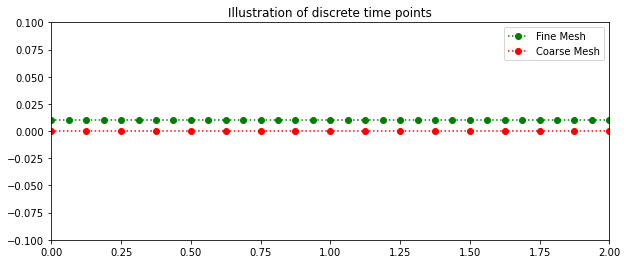

In [4]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
N2=N*2
h2=(b-a)/(N2)
t2=np.arange(a,b+h2,h2)
w2=np.zeros(len(t2))

fig = plt.figure(figsize=(10,4))
plt.plot(t2,0.01*np.ones(len(t2)),'o:',color='green',label='Fine Mesh')
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')
plt.show()

## 2-step Abysmal Butler Method 
The 2-step Abysmal Butler difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(4(t_i-w_i)-3(t_{i-1}-w_{i-1})), $$
for $i=1,...N.$
For $i=0$ the system of difference equation is:

$$w_{1} = w_{0} + \frac{h}{2}(4(t_0-w_0)-3(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(4(t_1-w_1)-3(t_{0}-w_{0})) $$
this is not solvable a <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [5]:
### Initial conditions
IC=1
w=np.zeros(len(t))
w[0]=IC

w2=np.zeros(len(t2))
w2[0]=IC
w2[1]=(IC+1)*np.exp(-t2[1])+t2[1]-1



### Loop


In [6]:

# Fine Mesh
for k in range (1,N2):
    w2[k+1]=(w2[k]+h2/2.0*(4*myfun_ty(t2[k],w2[k])-3*myfun_ty(t2[k-1],w2[k-1]))) 
    
    
w[1]=w2[2]

# Coarse Mesh
for k in range (1,N):
    w[k+1]=(w[k]+h/2.0*(4*myfun_ty(t[k],w[k])-3*myfun_ty(t[k-1],w[k-1])))   


### Plotting solution

In [7]:
def plotting(t,w,t2,w2):
    y=(2)*np.exp(-t2)+t2-1
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Coarse Mesh (N)')
    plt.plot(t2,w2, 'v-',color='green',label='Fine Mesh (2N)')


    plt.plot(t2,y, 'o-',color='black',label='Exact?')
    plt.xlabel('time')
    plt.legend()
    plt.title('Abysmal Butler')
    plt.show 

The plot below shows the Abysmal-Butler approximation for a low N (red) and $N\times2$ (green) and the exact solution (black) of the intial value problem

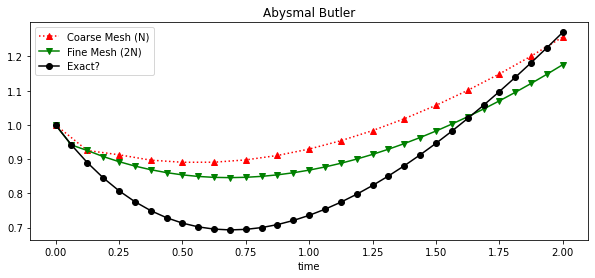

In [8]:
plotting(t,w,t2,w2)

## Convergent 
The Abysmal-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{3}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{3}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{3}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{3}{2}L|w-\hat{w}|\leq \frac{7}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-\hat{w_i}|\rightarrow 0$$ 
as $h \rightarrow 0$,
but as it is not consistent it will never converge to the exact solution
$$ |y_i-w_i| \not= 0.$$


In [9]:
d = {'time': t[0:5], 'Abysmal Butler': w[0:5],'Abysmal Butler w2 N*2': w2[0:10:2],
     'w-w2':np.abs(w[0:5]-w2[0:10:2])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Butler,Abysmal Butler w2 N*2,w-w2
0,0.000,1.000000,1.000000,0.000000
1,0.125,0.925223,0.925223,0.000000
2,0.250,0.912667,0.892595,0.020072
3,0.375,0.897042,0.869112,0.027930
4,0.500,0.890782,0.853975,0.036807
